In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
encash = pd.read_csv('/content/EncashmentData.csv',parse_dates=['Date of\nEncashment'])
dp = pd.read_csv('/content/PurchaseData.csv',parse_dates=['Date of Purchase'])

<ipython-input-43-49d5fa86b947>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  encash = pd.read_csv('/content/EncashmentData.csv',parse_dates=['Date of\nEncashment'])
<ipython-input-43-49d5fa86b947>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dp = pd.read_csv('/content/PurchaseData.csv',parse_dates=['Date of Purchase'])


In [18]:
encash.head()

,Date of\nEncashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [19]:
encash.describe()

,Date of\nEncashment,Denomination
count,20421,2.042100e+04
mean,2021-12-23 18:57:08.118113536,6.252921e+06
min,2019-04-12 00:00:00,1.000000e+03
25%,2020-11-02 00:00:00,1.000000e+06
50%,2022-04-11 00:00:00,1.000000e+07
75%,2023-07-13 00:00:00,1.000000e+07
max,2024-01-24 00:00:00,1.000000e+07
std,NaN,4.576321e+06


In [20]:
encash['Date of\nEncashment']=pd.to_datetime(encash['Date of\nEncashment'])
encash.set_index('Date of\nEncashment',inplace=True)
monthly_donations=encash.resample('M')['Denomination'].sum()

In [21]:
df['Denomination']=df['Denomination']/1e7
df

NameError: name 'df' is not defined

Text(0, 0.5, 'Denominations')

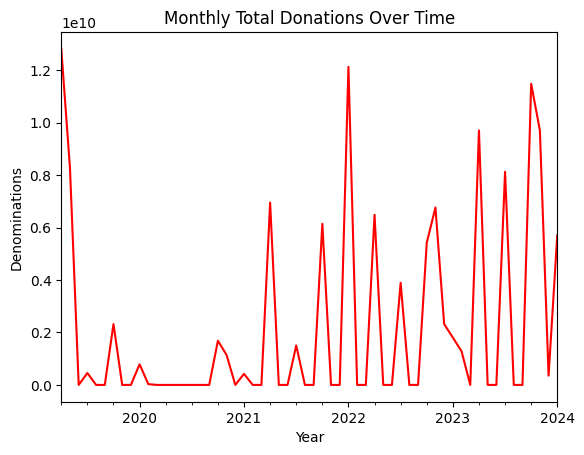

In [22]:
import matplotlib.pyplot as plt
monthly_donations.plot(kind='line',color='red')
plt.title('Monthly Total Donations Over Time')
plt.xlabel('Year')
plt.ylabel('Denominations')

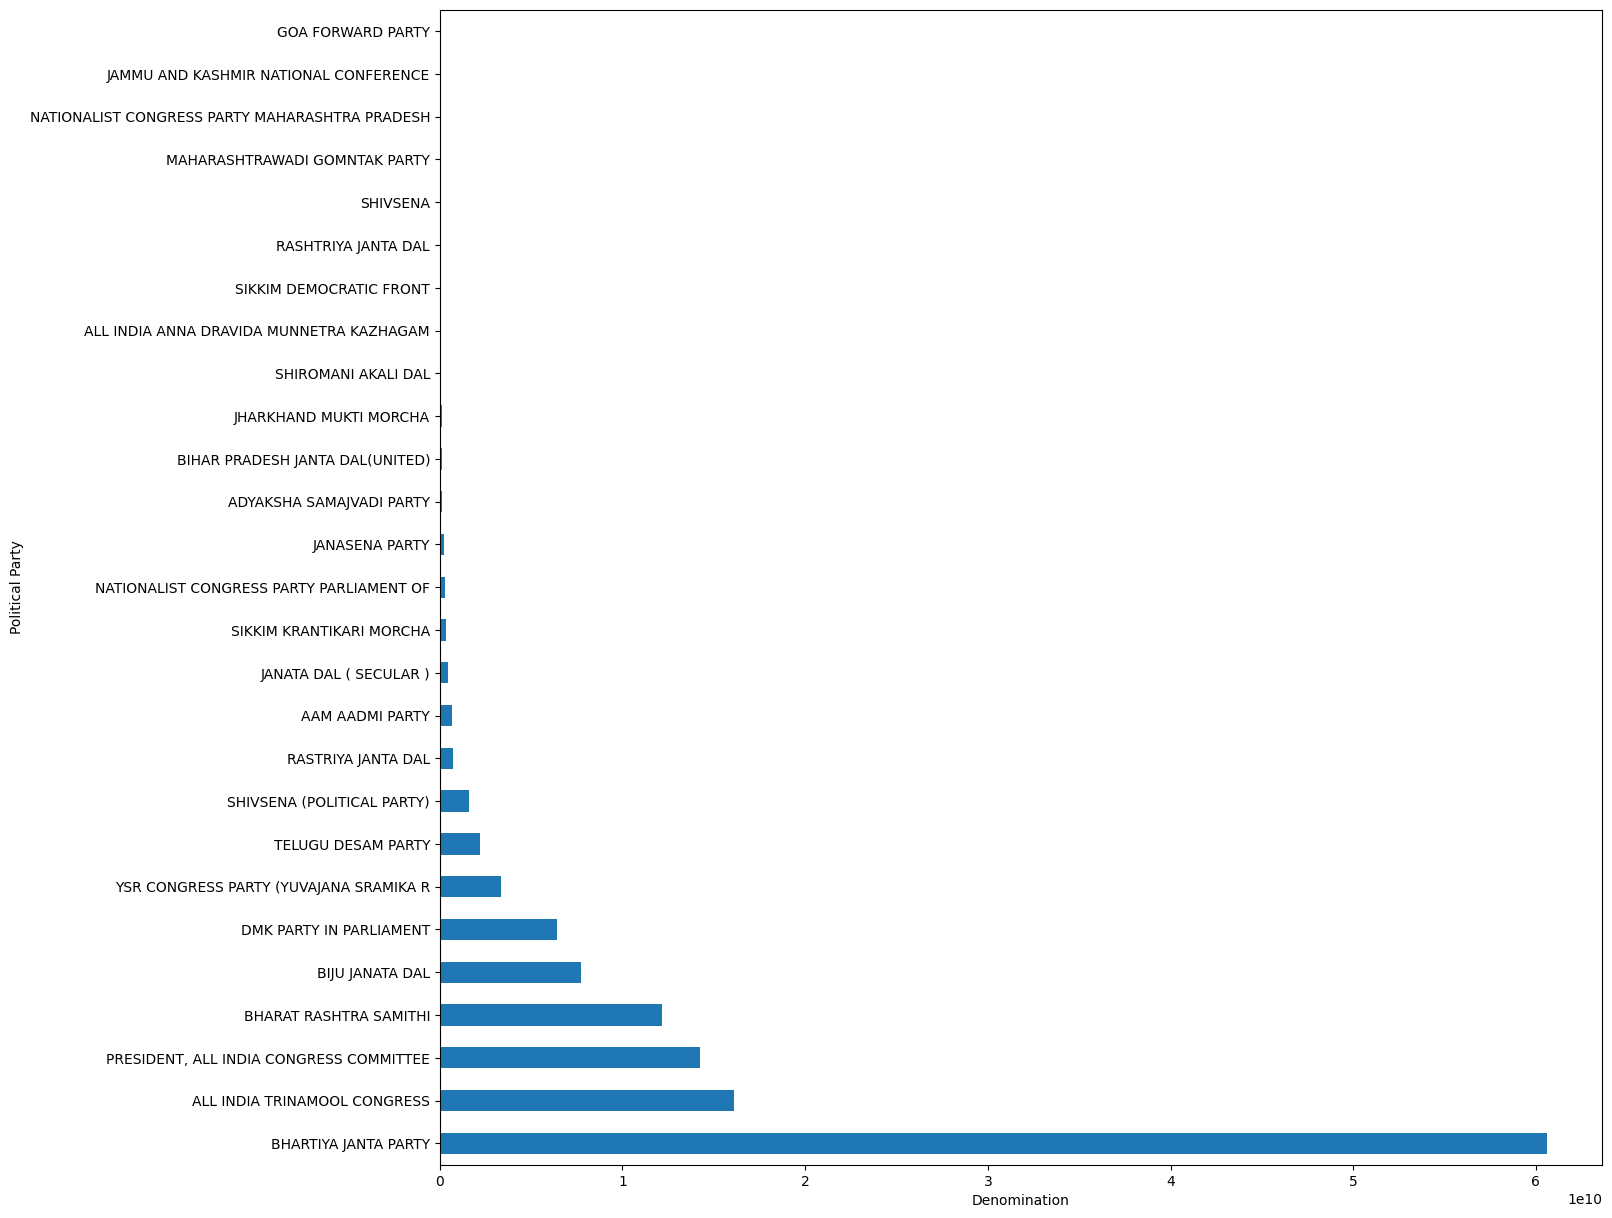

In [29]:
party_funds=encash.groupby('Name of the Political Party')
plt.figure(figsize=(15,15))
party_funds['Denomination'].sum().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Denomination')
plt.ylabel('Political Party')
#plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Denomination'>

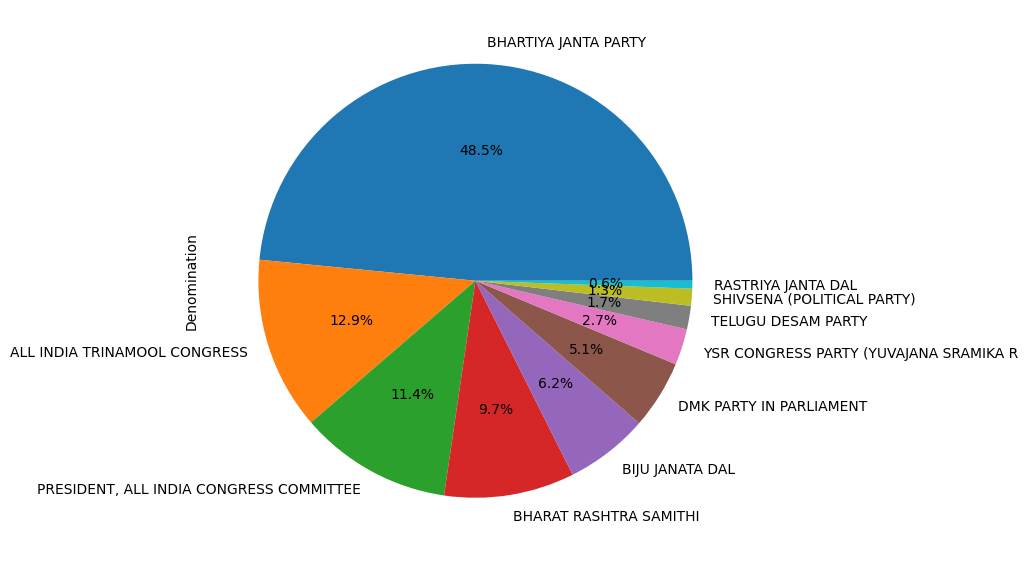

In [32]:
party_funds['Denomination'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%',figsize=(7,10))

In [35]:
def donations(party_name):
  party=encash['Name of the Political Party']==party_name
  party_donations=encash[party]
  return party_donations['Denomination'].sum()

In [36]:
donations('BHARTIYA JANTA PARTY')

60605111000.0

In [38]:
donations('PRESIDENT, ALL INDIA CONGRESS COMMITTEE')

14218655000.0

In [37]:
donations('ALL INDIA TRINAMOOL CONGRESS')

16095314000.0

In [39]:
donations("BHARAT RASHTRA SAMITHI")

12147099000.0

In [40]:
donations("RASTRIYA JANTA DAL")

725000000.0

In [41]:
electoral_bonds_parties=party_funds['Denomination'].sum().sort_values(ascending=False).reset_index()
electoral_bonds_parties['Percentange of Funds']=electoral_bonds_parties['Denomination']/sum(electoral_bonds_parties['Denomination'])*100
electoral_bonds_parties

,Name of the Political Party,Denomination,Percentange of Funds
0,BHARTIYA JANTA PARTY,6.060511e+10,47.462360
1,ALL INDIA TRINAMOOL CONGRESS,1.609531e+10,12.604904
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1.421866e+10,11.135215
3,BHARAT RASHTRA SAMITHI,1.214710e+10,9.512894
4,BIJU JANATA DAL,7.755000e+09,6.073260
5,DMK PARTY IN PARLIAMENT,6.390000e+09,5.004272
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,3.370000e+09,2.639186
7,TELUGU DESAM PARTY,2.188800e+09,1.714139
8,SHIVSENA (POLITICAL PARTY),1.583814e+09,1.240350
9,RASTRIYA JANTA DAL,7.250000e+08,0.567777


# ****PURCHASE ANALYSIS****

In [45]:
dp['Date of Purchase']=pd.to_datetime(dp['Date of Purchase'])
dp.set_index('Date of Purchase',inplace=True)
dp['Denomination']=dp['Denomination']/1e7
dp

,Purchaser Name,Denomination
Date of Purchase,,
2019-04-12,A B C INDIA LIMITED,0.01
2019-04-12,A B C INDIA LIMITED,0.01
2019-04-12,A B C INDIA LIMITED,0.10
2019-04-12,A B C INDIA LIMITED,0.10
2019-04-12,A B C INDIA LIMITED,0.01
...,...,...
2024-01-11,WESTWELL GASES PRIVATE LIMITED,1.00
2024-01-11,WESTWELL GASES PRIVATE LIMITED,1.00
2024-01-11,WESTWELL GASES PRIVATE LIMITED,1.00


<Axes: xlabel='Purchaser Name'>

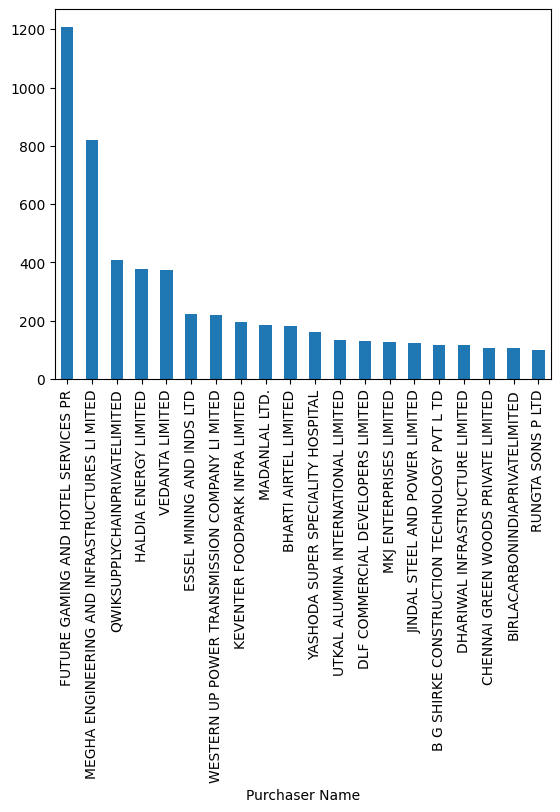

In [46]:
purchaser=dp.groupby('Purchaser Name')
purchaser['Denomination'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [47]:
purchaser_data=purchaser['Denomination'].sum().sort_values(ascending=False).head(45).reset_index()
purchaser_data['Percentage of Amount']=purchaser_data['Denomination']/sum(purchaser_data['Denomination'])*100
purchaser_data

,Purchaser Name,Denomination,Percentage of Amount
0,FUTURE GAMING AND HOTEL SERVICES PR,1208.00,17.289202
1,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,821.00,11.750360
2,QWIKSUPPLYCHAINPRIVATELIMITED,410.00,5.868024
3,HALDIA ENERGY LIMITED,377.00,5.395719
4,VEDANTA LIMITED,375.65,5.376398
5,ESSEL MINING AND INDS LTD,224.50,3.213101
6,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,220.00,3.148696
7,KEVENTER FOODPARK INFRA LIMITED,195.00,2.790889
8,MADANLAL LTD.,185.50,2.654923
9,BHARTI AIRTEL LIMITED,183.00,2.619142


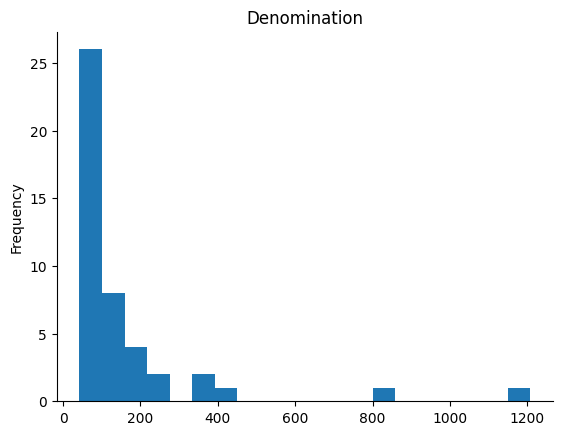

In [49]:
from matplotlib import pyplot as plt
purchaser_data['Denomination'].plot(kind='hist', bins=20, title='Denomination')
plt.gca().spines[['top', 'right',]].set_visible(False)